# Candlestick Evening Star

https://www.investopedia.com/terms/e/eveningstar.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2018-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.42,11.02,10.34,10.98,10.98,44146300
2018-01-03,11.61,12.14,11.36,11.55,11.55,154066700
2018-01-04,12.10,12.43,11.97,12.12,12.12,109503000
2018-01-05,12.19,12.22,11.66,11.88,11.88,63808900
2018-01-08,12.01,12.30,11.85,12.28,12.28,63346000


## Candlestick with Morning Star

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,True


Text(0, 0.5, 'Price')

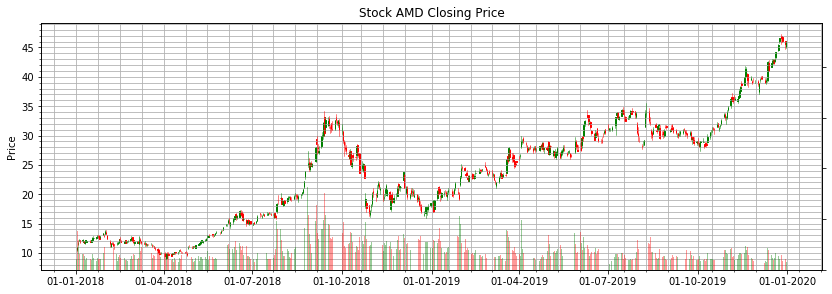

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
evening_star = talib.CDLEVENINGSTAR(df['Open'], df['High'], df['Low'], df['Close'])

evening_star = evening_star[evening_star != 0]

In [6]:
df['evening_star'] = talib.CDLEVENINGSTAR(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['evening_star'] !=0]

,Open,High,Low,Close,Adj Close,Volume,evening_star
Date,,,,,,,
2018-01-30,13.120000,13.270000,12.690000,12.870000,12.870000,91236400,-100
2018-02-28,12.660000,12.730000,12.100000,12.110000,12.110000,43387500,-100
2018-04-30,11.060000,11.140000,10.870000,10.880000,10.880000,50608800,-100
2019-01-22,20.480000,20.920000,19.700001,19.760000,19.760000,78513700,-100
2019-03-04,23.889999,24.129999,23.010000,23.370001,23.370001,48147700,-100


In [8]:
df['Adj Close'].loc[df['evening_star'] !=0]

Date
2018-01-30    12.870000
2018-02-28    12.110000
2018-04-30    10.880000
2019-01-22    19.760000
2019-03-04    23.370001
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['evening_star'] !=0].index

DatetimeIndex(['2018-01-30', '2018-02-28', '2018-04-30', '2019-01-22',
               '2019-03-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
evening_star

Date
2018-01-30   -100
2018-02-28   -100
2018-04-30   -100
2019-01-22   -100
2019-03-04   -100
dtype: int32

In [11]:
evening_star.index

DatetimeIndex(['2018-01-30', '2018-02-28', '2018-04-30', '2019-01-22',
               '2019-03-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,evening_star
Date,,,,,,,
2018-01-02,10.420000,11.020000,10.340000,10.980000,10.980000,44146300,0
2018-01-03,11.610000,12.140000,11.360000,11.550000,11.550000,154066700,0
2018-01-04,12.100000,12.430000,11.970000,12.120000,12.120000,109503000,0
2018-01-05,12.190000,12.220000,11.660000,11.880000,11.880000,63808900,0
2018-01-08,12.010000,12.300000,11.850000,12.280000,12.280000,63346000,0
...,...,...,...,...,...,...,...
2019-12-24,46.099998,46.610001,45.770000,46.540001,46.540001,44432200,0
2019-12-26,46.990002,47.310001,45.660000,46.630001,46.630001,57562800,0
2019-12-27,46.849998,46.880001,45.980000,46.180000,46.180000,36581300,0


Text(0, 0.5, 'Price')

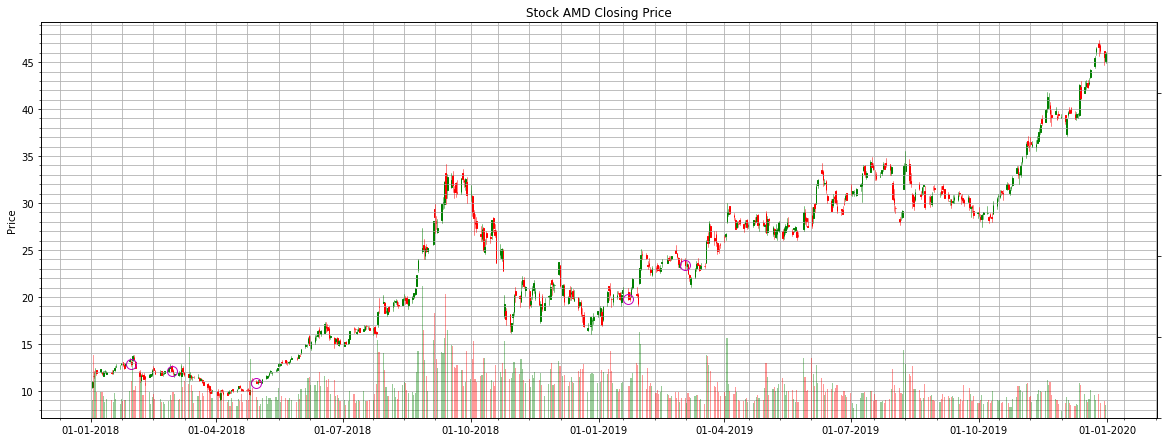

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['evening_star'] !=0].index, df['Adj Close'].loc[df['evening_star'] !=0],
                'om', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2018-01-01':'2019-03-31']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,evening_star,VolumePositive
0,736696.0,10.42,11.02,10.34,10.98,10.98,44146300,0,True
1,736697.0,11.61,12.14,11.36,11.55,11.55,154066700,0,False
2,736698.0,12.10,12.43,11.97,12.12,12.12,109503000,0,True
3,736699.0,12.19,12.22,11.66,11.88,11.88,63808900,0,False
4,736702.0,12.01,12.30,11.85,12.28,12.28,63346000,0,True


Text(0, 0.5, 'Price')

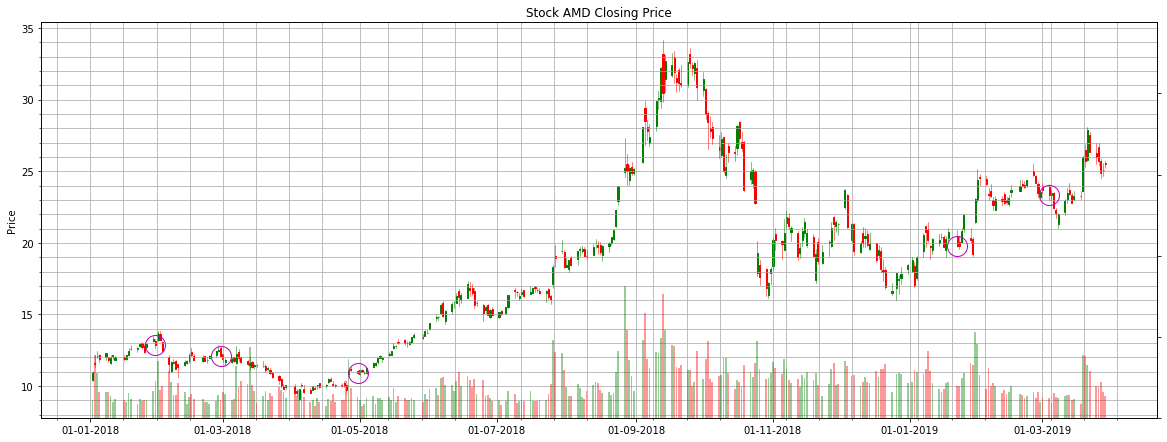

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['evening_star'] !=0].index, df['Adj Close'].loc[df['evening_star'] !=0],
                'om', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')